Realizaremos un análisis exploratorio de un dataset llamado Titanic, que es muy usado en la industria para practicar. Este análisis es en base a una clase de un diplomado que me encuentro cursando.

Importamos las librerías   

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Cargamos nuestro DataSet

In [2]:
excel = 'Dataset_titanic.xlsx'
df = pd.read_excel(excel)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket       Fare Cabin Embarked  
0      0         A/5 21171       7.25   NaN        S  
1      0          PC 17599  712833.00   C85        C  
2      0  STON/O2. 3101282    7925.00   NaN        S  
3      0            113803      53.10  C123        S  
4      0            373450       8.05   NaN  

Realizamos un análisis exploratorio de base

Cantidad de columnas y filas

In [3]:
df.shape

(891, 12)

Nombre de las columnas

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Información de las columnas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Suma de datos nulos

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Descripción estadistica de los datos numéricos

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,1.271697e+05
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,4.112720e+05
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,1.445000e+01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,7.100000e+01
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,7.895800e+04
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,5.123292e+06


Ahora entraremos en mayor profundidad en el análisis exploratorio, es decir en el caso particular de este dataset

Veremos que podemos hacer con los datos faltantes. Tenemos varias opciones.

En el caso particular de la columna Age, vemos como se distribuyen sus datos

<AxesSubplot:>

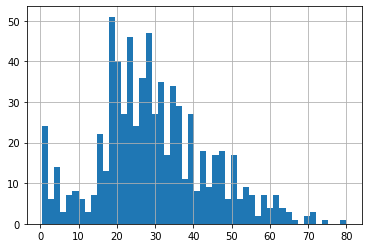

In [9]:
df['Age'].hist(bins=50)

Vemos que se distribuyen de forma mas o menos normal, por lo cual, en este caso reemplazaremos los datos con la mediana.

In [11]:
df2 = df.copy()

df2['Age'] = df2['Age'].fillna(df2['Age'].median())
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ahora en el caso de la columna Cabin, tiene muchos valores faltantes. Además hay muchas cabinas dentro del titanic, es una categoría muy atomizada, por lo cual no nos dice mucho.

Se puede hacer un esfuerzo por rescatar la columna, rellenando los datos faltantes con un valor que no se utilice en la columna como por ejemplo "Desconocidos"

In [12]:
df3 = df2.copy()

df3['Cabin']=df3['Cabin'].fillna('Desconocido')
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Sin embargo, como mencionamos anteriormente la cabina no nos da mucha información por lo cual finalmente eliminaremos esa columna

In [14]:
df2.drop('Cabin',axis=1,inplace=True)
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Por ultimo en el Embarked vemos que solo nos faltan 2 datos, aca si podemos reemplazar esos datos faltantes. Veremos que tan atomizado esta nuestra columna.

In [15]:
df2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Vemos que solo tiene 3 categorías y la que más se repite o la moda es S. Por lo cual reeemplazaremos esos datos faltantes con la moda, ya que por estadistica tenemos mayor probabilidad de que esos sean los valores que correspondan a esos datos.

In [21]:
df2['Embarked']=df2['Embarked'].fillna(df2['Embarked'].mode()[0])
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64